# Initial Amplitude
This script explores how we might explore the initial amplitude of a 1.4 m.a. glacial/interglacial cycle

It does so by letting us change the mean and amplitude of the benthic d18O cycle until it matches dome C ice core d18O. We can then use the amplitude of this modified benthic d18O at 1.4 m.a. as a starting point for our model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Load data

In [2]:
# dome C
domec_df=pd.read_csv('Grisart_etal-2022.csv')
domec_age = domec_df['age_ka'].to_numpy()
domec_d18O = domec_df['d18O'].to_numpy()

# benthic d18O
benthic_df = pd.read_csv('LR04stack.csv',header=4)
benthic_age = benthic_df['Time (ka)'].to_numpy()
benthic_d18O = benthic_df['Benthic d18O (per mil)'].to_numpy()

# Initial Plots

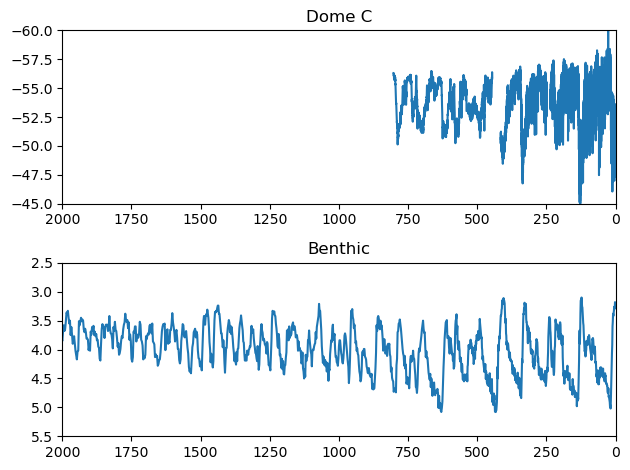

In [3]:
fig,axs = plt.subplots(2)
axs[0].plot(domec_age,domec_d18O,label='Benthic d18O - original')
axs[0].set_xlim([2000,0])
axs[0].set_ylim([-45,-60])
axs[0].set_title('Dome C')
axs[1].plot(benthic_age,benthic_d18O,label='Benthic d18O - original')
axs[1].set_xlim([2000,0])
axs[1].set_ylim([5.5,2.5])
axs[1].set_title('Benthic')
plt.tight_layout()

Initial Amplitude is 5.800000000000004


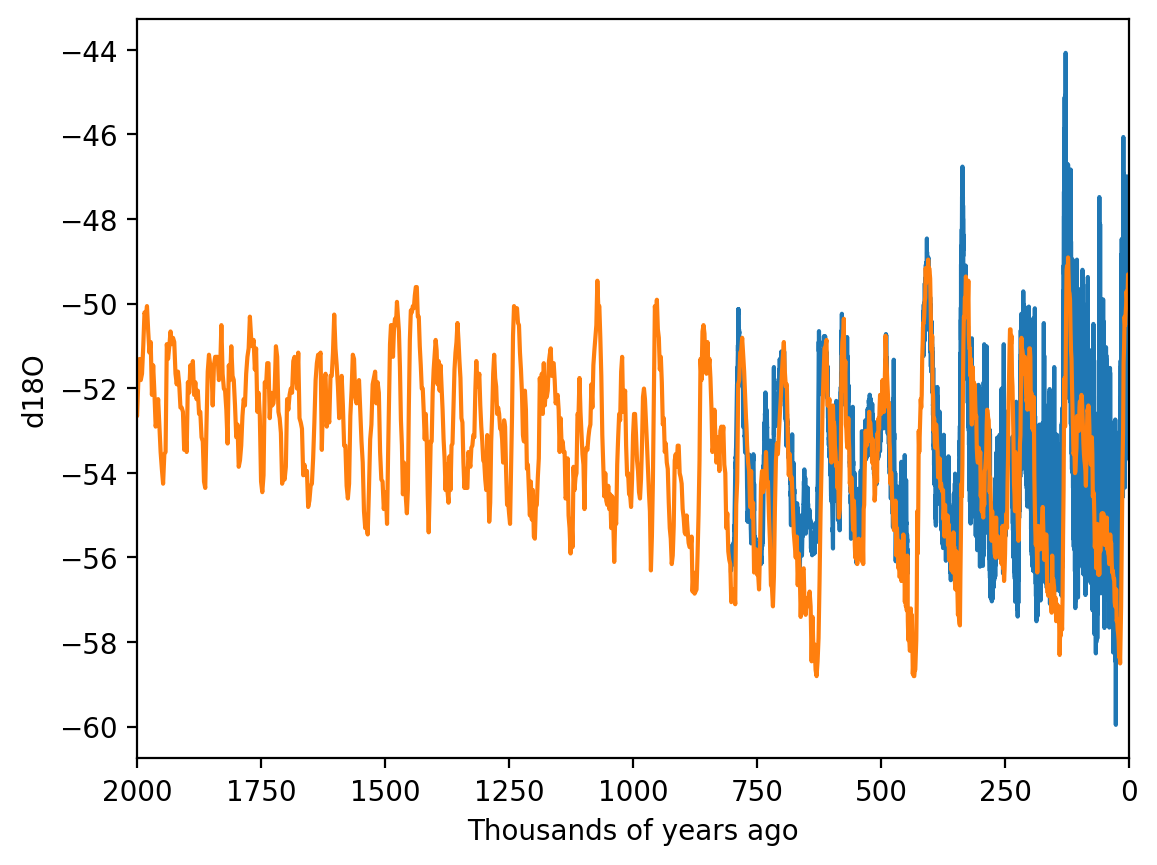

In [11]:
# Modify amplitude and mean of benthic d18O to match dome C
#!!!!!!!!!!!!!!!!
# change these two numbers to make the lines match!
#!!!!!!!!!!!!!!!!
mean_change = -52 #(likely around -50)
amp_change = 5* -1 #(leave *-1 as benthic d18O and ice core d18O have opposite trends!)
benthic_mod_d18O = (benthic_d18O-np.mean(benthic_d18O))* amp_change+mean_change

fig,axs = plt.subplots(dpi=200)
axs.plot(domec_age,domec_d18O,label='Benthic d18O - original')
axs.plot(benthic_age,benthic_mod_d18O,label='Benthic d18O - original')
axs.set_xlim([2000,0])
axs.set_xlabel('Thousands of years ago')
axs.set_ylabel('d18O')

# Calculate amplitude between 1.35 and 1.45 million years ago
idx1 = benthic_age<1450
idx2 = benthic_age>1350
idx = idx1*idx2
amplitude = np.max(np.abs(benthic_mod_d18O[idx])) - np.min(np.abs(benthic_mod_d18O[idx]))
print("Initial Amplitude is "+str(amplitude))